<a href="https://colab.research.google.com/github/AmandeepSingh789/ML-Project/blob/main/Neural_Network_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [4]:
df = pd.read_csv("/content/wine-reviews.csv", usecols = ['country', 'description', 'points', 'price', 'variety', 'winery'])

In [5]:
df.head()


,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [6]:
# We will use the description to predict the points 

df=df.dropna(subset=["description","points"])
# Drops the null values 

In [7]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


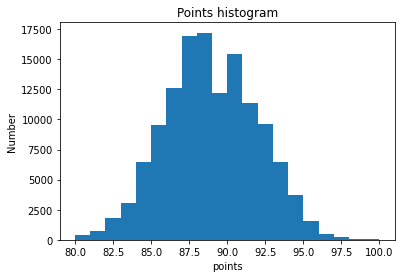

In [8]:
# Checking distribution of points
plt.hist(df.points,bins=20)
plt.title("Points histogram")
plt.xlabel("points")
plt.ylabel("N")
plt.show()

In [10]:
# Will try to classify reviews as low or high. below 90 or above 90.

df["label"] = (df.points >= 90).astype(int)
df= df[["description","label"]]

In [12]:
df.head()

,description,points,label
0,"Aromas include tropical fruit, broom, brimston...",87,0
1,"This is ripe and fruity, a wine that is smooth...",87,0
2,"Tart and snappy, the flavors of lime flesh and...",87,0
3,"Pineapple rind, lemon pith and orange blossom ...",87,0
4,"Much like the regular bottling from 2012, this...",87,0


In [17]:
# Splitting data
train,val,test = np.split(df.sample(frac=1),[int(0.8*len(df)),int(0.9*len(df))])

In [19]:
# Function to convert data to tensorflow dataset
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df["description"]
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [21]:
train_data=df_to_dataset(train)
valid_data=df_to_dataset(val)
test_data=df_to_dataset(test)

In [24]:
# Converting text to numbers
embedding= "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer= hub.KerasLayer(embedding,dtype=tf.string, trainable=True)

In [25]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.300849  , -0.17452087, -0.01344201, ..., -0.05620423,
        -0.1558019 ,  0.01822366],
       [ 0.23857409, -0.15336828, -0.02306656, ..., -0.02622069,
        -0.32692724, -0.02276733],
       [ 0.42411777, -0.5305396 , -0.02287043, ...,  0.23698376,
        -0.1916291 , -0.1848558 ],
       ...,
       [ 0.7335871 , -0.25333142, -0.329568  , ..., -0.03264398,
         0.05737778,  0.22990201],
       [ 0.20361888, -0.09618905,  0.07629968, ..., -0.11393062,
        -0.11205729,  0.10324283],
       [ 0.25147846, -0.50948316, -0.20560919, ..., -0.03072928,
        -0.4262279 , -0.15619768]], dtype=float32)>

In [26]:
model =tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [28]:
model.evaluate(train_data)

102/102 [==============================] - 5s 19ms/step - loss: 0.7019 - accuracy: 0.4066


[0.7018964886665344, 0.40662267804145813]

In [29]:
model.evaluate(valid_data)

13/13 [==============================] - 0s 21ms/step - loss: 0.7017 - accuracy: 0.4077


[0.7017413377761841, 0.4077094793319702]

In [30]:
history = model.fit(train_data,epochs=10,validation_data=valid_data)

Epoch 1/10
102/102 [==============================] - 78s 745ms/step - loss: 0.5870 - accuracy: 0.6767 - val_loss: 0.4299 - val_accuracy: 0.7984
Epoch 2/10
102/102 [==============================] - 63s 615ms/step - loss: 0.3852 - accuracy: 0.8228 - val_loss: 0.3717 - val_accuracy: 0.8327
Epoch 3/10
102/102 [==============================] - 58s 563ms/step - loss: 0.3361 - accuracy: 0.8499 - val_loss: 0.3623 - val_accuracy: 0.8353
Epoch 4/10
102/102 [==============================] - 57s 553ms/step - loss: 0.3104 - accuracy: 0.8643 - val_loss: 0.3634 - val_accuracy: 0.8387
Epoch 5/10
102/102 [==============================] - 57s 555ms/step - loss: 0.2908 - accuracy: 0.8751 - val_loss: 0.3658 - val_accuracy: 0.8358
Epoch 6/10
102/102 [==============================] - 57s 558ms/step - loss: 0.2747 - accuracy: 0.8829 - val_loss: 0.3710 - val_accuracy: 0.8343
Epoch 7/10
102/102 [==============================] - 57s 556ms/step - loss: 0.2611 - accuracy: 0.8893 - val_loss: 0.3776 - val_ac

In [ ]:
plt.plot(history.history['acc'],"Training Accuracy")
plt.plot(history.history['val_acc'],label="Validation Accuracy")
plt.title("Accuracy")